# Index:
* **[Configure Attributes](#section0)**
* **[Part 1- Training and Prediction (Categorical) ](#section22)**
* **[Part 2- Training and Prediction (Numerical) ](#section32)**
* **[Part 3- Contrast the effectiveness of Misclassification rate, Gini, Entropy as impurity measures.](#section4)**
* **[Part 4- Generate Graphs (Training Data)](#section52)**
* **[Part 5- Generate Graphs (Validation error Vs Depth/Number of nodes ](#section62)**


* [Utility functions common for both part](#section1)
* [Part-1 : Training on catergorical data](#section2)
    - [Algorithm](#section21)
    - [Training and Prediction](#section22)
* [Part-2: Training with categorical and numerical features.](#section3)
    - [Algorithm](#section31)
    - [Training and Prediction](#section32)
* [Part-3: Contrast the effectiveness of Misclassification rate, Gini, Entropy as impurity measures.](#section4)
* [Part-4: Visualise training data on a 2-dimensional plot.](#section5)
    - [Code](#section51)
    - [Generate Graphs](#section52)
* [Part-5: Validation error with respect to depth of decision tree.](#section6)
    - [Code](#section61)
    - [Generate Graphs](#section62)
    
* [Comparision of my algorithm with scikit-learn.](#section8)
    

## 1. Code Structure

The code for this assignment is modularized as a set of functions.
Each of the function maps to some logical unit.


## 2. Libraries Used

We have used various python core libraries for this assignment:
1. **pandas**: For data manipulation and analysis.
2. **numpy**: To perform various mathematical operations on multi-dimensional arrays and matrices. 
3. **matplotlib**: Plotting library to draw graphs.

In [62]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## <a style="text-decoration:none;color:#000" id="section0">3. Configurable Features</a>

**Note: You can change this part as per your requirements**

The attributes/features in the training file used for training the decision tree can be either numerical or categorical.
<br>
Prior to build the decision tree we need to know that which of these features are numerical (defined in a contineous range) and which are categorical (having discrete values)

As a part of our assigment following two lists are used to diffentiate between categorical and numerical features:
1. **cFeatures**: Containing column names of categorical features as per the training data.
1. **nFeatures**: Containing column names of numerical features as per the training data

In [15]:
#Provide the column names of categorical attributes
cFeatures=['Work_accident','promotion_last_5years','sales','salary']

#Provide the column names of numerical attributes
nFeatures=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']

## <a style="text-decoration:none;color:#000" id="section1">4. Impurity Measures</a>

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). 
<br>
To calculate this homogeneity there are various impurity measures we have used:
1. **Entropy:** $$ E(S) = -(qlog_2(q)+(1-q)log_2(1-q)$$
<hr>
1. **Gini Index:** $$ E(S) = 2q(1-q)$$
<hr>
1. **Misclassification rate:** $$ E(S) = min(q,(1-q))$$


In [45]:
#function to calculate entropy
def entropy(q) :
    if q >= 1 or q <= 0:
        return 0
    return -( q*np.log2(q) + (1-q)*np.log2(1-q) )

#function to calculate Gini index
def gini(q) :
    return 2*q*(1-q)

#function to calculate Misclassification rate
def misClass(q) :
    return min(q,1-q)

## <a style="text-decoration:none;color:#000" id="">5. Information Gain</a>

The information gain is based on the decrease in impurity score after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the largest "information gain/ impurity reduction" (i.e., the most homogeneous branches). 		

Steps to calculate information gain (considering entropy as the impurity measure):
1. Calculate entropy, E(S), of the target/ training label i.e. "employees left" as discussed above.
<hr>
2. The dataset can be split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get the weighted entropy for the split. The resulting entropy is subtracted from target the entropy before the split. The result is the Information Gain, or decrease in entropy. 
Information Gain for attribute A:
$$ InfoGain(S,A) = E(S) - I(S,A) = E(S) - \sum_{i \in Values(A)} \frac{|S_i|}{|S|}E(S_i)$$
<hr>

### Calculating information gain for Categorical feature

Select the attribute which provide the largest information gain.

<br>
<center>$ Best-Categorical-Attribute = max(InfoGain(S,A_i))$ &nbsp;&nbsp;&nbsp; $\forall A_i \in Attributes $</center>


In [36]:
#Function to calculate information gain of an Attribute
#Parameters :
    # data = Training Data
    # currentAttr = Categorical Attribute of which information Gain is calculated
    # impType = Impurity measure (entropy | gini | misClass) used to calculate information gain
    # targetAttr = Target Attribute (Class Label) default is "left" column
#Return :
    # Return the information gain of current Attribute with impurity type(entrop/gini/misclass)
    
def infoGain(data,currentAttr,impType,targetAttr="left") :
    
    totalRows = data.shape[0] #total Rows in data
    
    #Class label unique values [0,1] and their corresponding counts [x,y]
    targetValues, targetValuesCount = np.unique(data[targetAttr],return_counts=True)
    
    #Current Attribute unique values ex. ["low","medium","high"] and their corresponding counts [x,y,z]
    currentValues, currentValuesCount = np.unique(data[currentAttr],return_counts=True)
    
    targetEntropy = impType(targetValuesCount[0]/(totalRows)) #target Entropy
    
    weightedEntropy = 0
    intrinsic = 0
    
    data1 = data.values
    valueMap = { j:0 for j in currentValues} #ex . {"low":0, "medium":0, "high":0}
    
    i=0
    while(i < totalRows):
        if data1[i][keyValueMap[targetAttr]] == 0:
            valueMap[data1[i][keyValueMap[currentAttr]]] += 1
        i += 1
        
    # summation (Si/S)*(entropy(left(=0)/Si)),(Sj/S)*(entropy(left(=0)/Sj)),.......
    for j,i in enumerate(currentValues):
        weightedEntropy += ( (currentValuesCount[j]/totalRows) * impType(valueMap[i]/currentValuesCount[j]) )
#         intrinsic += intrinsicCal(currentValuesCount[j]/totalRows)
        
    informationGain = targetEntropy - weightedEntropy
    return informationGain

In [46]:
#Function return best atrribute (having maximum information gain) with its information gain
#Parameters :
    # data = Training Data
    # cFeatures = Categorical Attributes list
    # impType = Impurity measure (entropy | gini | misClass) used to calculate information gain
    
#Return :
    # Tuple (best Attribute, Information gain)

def bestInfoGainFeature(data,cFeatures,impType):
    infGains = [infoGain(data,feature,impType) for feature in cFeatures]
    featureIndex = np.argmax(infGains)
    bestFeature = cFeatures[featureIndex]
    return (bestFeature,infGains[featureIndex])

### Calculating information gain for Numerical feature

Let we have numerical feature $$X=\{x_1,x_2,...x_n\}$$

Taking $x_1$ as a split point , calculate information gain of X on split $x_1$
<br><br>
$$ InfoGain(S,X=x_1) = E(S) - I(S,X=x_1) = E(S) - \sum_{i <= x_1 \space|\space i>x_1} \frac{|S_i|}{|S|}E(S_i)$$
<hr>
Simlarly,
$$ InfoGain(S,X=x_2) = E(S) - I(S,X=x_2) = E(S) - \sum_{i <= x_2 \space|\space i>x_2} \frac{|S_i|}{|S|}E(S_i)$$
$$.$$
$$.$$
$$ InfoGain(S,X=x_n) = E(S) - I(S,X=x_n) = E(S) - \sum_{i <= x_n \space|\space i>x_n} \frac{|S_i|}{|S|}E(S_i)$$
<br>
<hr>
<br>
$$ InfoGain Numerical(S,X) = max(InfoGain(S,X=x_i)) \space\space\space \forall x_i \in X$$
<hr>
<br>
<center>$ Best-Numerical-Attribute = max(InfoGain Numerical(S,A_i))$ &nbsp;&nbsp;&nbsp; $\forall A_i \in Attributes $</center>

In [63]:
#Function return best split (having maximum information gain) for the atrribute having contineous values

#Parameters :
    # data = Training Data
    # currentAttr = Attribute (contineous value) of which information Gain and split is calculated
    # impType = Impurity measure (entropy | gini | misClass) used to calculate information gain
    # targetAttr = Target Attribute (Class Label) default is "left" column
#Return :
    # Tuple (best split value, Information gain)

def numericSplitInfoGain(data,currentAttr, impType,target="left"):
    totalRows = data.shape[0]
    
    #sort data on numerical attribute
    data = data.sort_values(by=currentAttr, ascending=True, inplace=False)
    
    data1 = data.values
    ones  = np.sum(data[target]) #count of left=1 in data
    zeros = totalRows-ones #count of left=0 in data
    
    targetEntropy=impType(ones/(totalRows))
    
    lableCountsForLess=[0,0]
    labelCountsForGreater=[0,0]
    
    bestSplit = 0
    mxInfoGain = -1
    i = 0
    currentIndex = keyValueMap[currentAttr]  #index of current Attribute
    targetIndex = keyValueMap[target]   #index of target Attribute
    while i < totalRows:
        numericValue = data1[i][currentIndex]
        checkClass = data1[i][targetIndex]
        if checkClass == 0:
            #count of target's zeros for currentAttr <= numericaval
            lableCountsForLess[0] += 1
        else:
            #count of target's ones for currentAttr <= numericaval
            lableCountsForLess[1] += 1
        
        #count of target's zeros for currentAttr > numericaval
        labelCountsForGreater[0] = zeros - lableCountsForLess[0]
        #count of target's ones for currentAttr > numericaval
        labelCountsForGreater[1] = ones - lableCountsForLess[1]
        
        if( i+1 != totalRows and data1[i+1][currentIndex] == numericValue):
            i += 1
            continue

        #count of datasets with currentAttr <= numeric
        recordsLessThanNumeric = np.sum(lableCountsForLess)
        #count of datasets with currentAttr > numeric
        recordsGreaterThanNumeric = np.sum(labelCountsForGreater)
        
        a=0
        b=0

        if recordsLessThanNumeric:
            a = (recordsLessThanNumeric/totalRows) * impType(lableCountsForLess[0]/recordsLessThanNumeric)
        if recordsGreaterThanNumeric:
            b = (recordsGreaterThanNumeric/totalRows)*impType(labelCountsForGreater[0]/recordsGreaterThanNumeric)
        
        weightedEntropy = a+b
        informationGain = (targetEntropy-weightedEntropy)
        
        if(informationGain >= mxInfoGain):
            mxInfoGain = informationGain
            bestSplit = numericValue
        i += 1
    return (bestSplit,mxInfoGain)

In [43]:
#Function return best atrribute (amongst all attributes with contineous values) having maximum information gain
#Parameters :
    # data = Training Data
    # impType = Impurity measure (entropy | gini | misClass) used to calculate information gain
#Return :
    # Tuple (best Attribute, best split, Information gain)
    
def bestInfoGainFeNumeric(data,impType):
    mxinFo = 0
    split = 0
    resF = ""
    for feature in nFeatures:
        fInfoG = numericSplitInfoGain(data,feature,impType)
        if fInfoG[1] >= mxinFo:
            resF = feature
            split = fInfoG[0]
            mxinFo = fInfoG[1]
    return (resF,split,mxinFo)

In [48]:
#Function initialize the global variables useful for all the routines
#Parameters :
    # trainFile = Training Data File
    # trainDataPercent = Impurity type (entropy | gini | misClass) used to calculate information gain
    # testFile = Test File to predict
#Return : True/False corresponding to errorfree configuration

def config(trainFile,trainDataPercent,testFile=None):
    testData=None
    global isValidateData
    isValidateData=True
    try:
        data=pd.read_csv(trainFile)
        try:
            if testFile:
                testData=pd.read_csv(testFile)
                isValidateData=False
        except:
            print("Error reading test data")
            return False
    except:
        print("Error reading training data")
        return False
    
    global keyValueMap
    keyValueMap={ j:i for i,j in enumerate(list(data.columns.values))}
    totalDataSets=len(data)
    trainDataSetCount=int(trainDataPercent*totalDataSets/100)
    
    global trainData
    trainData=data[:trainDataSetCount]
    
    global validateData
    if isValidateData:
        validateData=data[trainDataSetCount:]
    else:
        isValidateData=False
        validateData=testData
    return True

In [70]:
#Function predict and print the performance measures of class predicted by classifier
# having maximum information gain
#Parameters :
    # Tree = Decision tree
    # dType= Decision tree type ("categorical")|("numerical")
    # trainDataPercent= Train data percent (1-100)
    # impType = Impurity type -String ("entropy" | "gini" | "misClass")
    # wannaReturn = Boolean
    # targetAttr = Target Attribute (Class Label) default is "left" column
#Return :
    # Performance matrix (if wannaReturn=True)

def predict(tree,dType,trainDataPercent,impType,wannaReturn=False,targetAttr="left"):
    if len(validateData)==0:
        print("No test/validate data found")
        return

    if dType=="categorical":
        pFunc=predictClassCategorical
    elif dType== "numerical":
        pFunc=predictClassNumerical
    else:
        print("Wrong Parameter",dType)
        return
        
    validateData1=validateData.to_dict(orient = "records")
    
    if isValidateData:
        count=0
        TP=0
        TN=0
        keyVMapVali={ j:i for i,j in enumerate(list(validateData.columns.values))}
        
        totalRows=len(validateData)
        totalN=np.sum(validateData[targetAttr])
        totalP=totalRows-totalN
        
        for i in range(len(validateData1)):
            known=validateData.iloc[i][keyVMapVali[targetAttr]]
            pred=pFunc(tree,validateData1[i])
            if known==pred:
                if known==0:
                    TP+=1
                else:
                    TN+=1
        FN=totalP-TP
        FP=totalN-TN
        recall=TP/(TP+FN)
        precision=TP/(TP+FP)
        accuracy=(TP+TN)/(totalRows)
        f1Val=2*recall*precision/(recall+precision)

        if wannaReturn:
            return (100*(FP+FN)/totalRows,accuracy,precision,recall,f1Val)
        print("--------------------------------------------------------")
        print("My Classifier Results for ( ",dType," )")
        print("Trained on %d percent of Training data " %(trainDataPercent))
        print("Total DataSets: ",len(trainData)+totalRows)
        print("Training DataSets: ", len(trainData))
        print("Validation DataSets: ",totalRows)
        print("Impurity Measure: ",impType)
        print("Truelly Validated: ", (TP+TN))
        print("Falsely Validated: ", (FP+FN))
        print("--------------------------------------------------------")
        print("Accuracy: ",accuracy)
        print("Precision: ",precision)
        print("Recall: ", recall)
        print("F1-Score: ", f1Val)

    else:
        validateData.loc[:,'predicted'] = pd.Series()
        predCol=validateData.columns.get_loc('predicted')
        for i in range(len(validateData1)):
            validateData.iloc[i,predCol] = pFunc(tree,validateData1[i])
        print("Class predicted successfully: check output.csv")
        validateData
        validateData.to_csv("output.csv")
        

## <a style="text-decoration:none;color:#000" id="section2">5. Decision Tree training on categorical Features (Assignment- Part: 1)</a>

### <a style="text-decoration:none;color:#000" id="section21">-Algorithm</a>

```
buildTreeCategorical(filteredDatasets=tainingData,Attributes,impurityType,depth=100,targetAttr="left"):
```
**{**
```
    Create a root node for the tree
    
    Base Cases
   
        1. If all the filtered taining datasets have same value of target attribute (0 or 1) ,
        return that value as a single node tree root.
        
        2. If number of predicting attributes is empty, then Return the single node tree Root,
        with value = most common value of the target attribute in the filtered training datasets.
        
        3. If depth of the tree equals zero, then Return the single node tree Root,
        with value = most common value of the target attribute in the filtered training datasets/
        
    Otherwise Begin
    
        1. bestFeature ← Pick the attribute with maximum information gain amongst all categorical features.
        
        2. set the root = bestFeature
        
        3. Create a new tree branch with label 'maxi' which keeps the track of most common value of the target 
           attribute at this level (Useful if missing values appears in test data during prediction)
        
        4. For each possible value, vi, of bestFeature,
           -Let filteredDatasets(vi) be the subset of filteredDatasets that have the value vi for bestFeature.
           -Add a new tree branch with label 'vi' below Root, corresponding to the test A = vi.
           -Below this new branch add the subtree 
               buildTreeCategorical(filteredDatasets(vi),Attributes–{bestFeature},impurityType,depth,targetAttr)
    End
    Return Root
```
**}**

In [26]:
#Function train the decision tree on taking attributes as categorical and return the tree node
#Parameters :
    # filterdData = train data which keeps on filtering according to algorithm.
    # cFeatures = list of catergorical attributes on which tree will be trained
    # impType = Impurity type- Function (entropy | gini | misClass) used to calculate information gain
    # targetAttr = Target Attribute (Class Label) default is "left" column
#Return :
    # root node of tree

def buildTreeCategorical(filterdData,cFeatures,impType,depth=100,targetAttr="left"):
    
    #check if data is pure i.e all tuples have exact 1 type of label
    if(len(np.unique(filterdData[targetAttr]))<=1):
        return np.unique(filterdData[targetAttr])[0]
    
    #check if all the categorical attributes had been used
    elif(len(cFeatures)==0):
        values,count=np.unique(filterdData[targetAttr],return_counts=True)
        return values[np.argmax(count)]
    
    if(depth==0):
        values,count=np.unique(filterdData[targetAttr],return_counts=True)
        return values[np.argmax(count)]
    
    #else grow the tree for all possible value of best feature
    #threby filtering the data on that value of best feature
    else:
        #find best feature
        #create a node with best feature and return it at the end
        #remove best feature from local list of features(cFeatures) for now
        #execute a for loop for all possible value of best feature (filtering on this value), and create a branch on
            #this value [best][value1] and receive the result of recursive call on this filtered data      
        bestF=bestInfoGainFeature(filterdData,cFeatures, impType)[0]
        node={bestF:{}}
        cFeatures=[feature for feature in cFeatures if feature!=bestF]
        
        values,count=np.unique(filterdData[targetAttr],return_counts=True)
        node[bestF]["maxi"]=values[np.argmax(count)]
        for value in np.unique(filterdData[bestF]):
            #filter new datatable based on best feature [value]
            filteredData=filterdData.where(filterdData[bestF]==value).dropna()
            node[bestF][value]=buildTreeCategorical(filteredData,cFeatures,impType,depth-1)
        
    return node

In [27]:
def predictClassCategorical(tree,validateDataRow):
    dataCols=validateDataRow.keys()
    for key in dataCols:
        if key in tree.keys():
            try:
                temp=tree[key][validateDataRow[key]]
            except:
                return tree[key]["maxi"]
            if isinstance(temp,dict):
                return predictClassCategorical(temp,validateDataRow)
            else:
                return temp   

In [28]:
#Function initialize the global variables useful for all the routines
#Parameters :
    # trainFile = Training Data File
    # trainDataPercent = Impurity type (entropy | gini | misClass) used to calculate information gain
    # impType = Impurity type- Function (entropy | gini | misClass) used to calculate information gain
    # testFile = Test File to predict
#Return : performance matrix if needed

def trainAndTestCategorical(trainFile,trainDataPercent,impType,testFile=None):
    if not(config(trainFile,trainDataPercent,testFile)):
        return
    tree=buildTreeCategorical(trainData,cFeatures,impType)
#     print(tree)
    return predict(tree,"categorical",trainDataPercent,impType.__name__)

## <a style="text-decoration:none;color:#000" id="section22">-Training and Prediction (Categorical) </a>

You can pass following parameters in order:

* Param1     : Training Data file

* Param2     : Training Data (percent to train on) Ex. 90 means TrainingData=90% and ValidationData=10% (remaining data)

* Param3     : Impurity type, possible values: entropy , gini, misClass **(Note: this must be given without quotes)**

* Param4 (optional)  : testData file (if provided then it train data on percent provided and predict class for test data and create outpu.txt)

In [71]:
trainAndTestCategorical("train.csv",90,entropy)

--------------------------------------------------------
My Classifier Results for (  categorical  )
Trained on 90 percent of Training data 
Total DataSets:  11238
Training DataSets:  10114
Validation DataSets:  1124
Impurity Measure:  entropy
Truelly Validated:  842
Falsely Validated:  282
--------------------------------------------------------
Accuracy:  0.7491103202846975
Precision:  0.748886910062333
Recall:  1.0
F1-Score:  0.8564154786150713


# <a style="text-decoration:none;color:#000" id="section3">Part-2: Training with categorical and numerical features.</a>

## <a style="text-decoration:none;color:#000" id="section31">-Algorithm</a>

In [30]:
#Function train the decision tree with categorical and numerical features  and return the tree node
#Parameters :
    # filterdData = train data which keeps on filtering according to algorithm.
    # cFeatures = list of catergorical attributes (unused categorical features)
    # impType = Impurity type (entropy | gini | misClass) used to calculate information gain
    # targetAttr = Target Attribute (Class Label) default is "left" column
    # Note: uses nFeatures i.e numerical features in utility methods
#Return :
    # root node of tree
def buildTreeCatAndNum(filteredData,cFeatures,impType,depth=100,parentDataMode=None,targetAttr="left"):
    
    # check if data is empty, if so, return the class of target i.e "left" appeared maximum in its parent data
    if len(filteredData)==0:
        return parentDataMode
    
    # check if data is pure i.e all tuples have exact 1 type of label, if so return it
    if(len(np.unique(filteredData[targetAttr]))==1):
        return np.unique(filteredData[targetAttr])[0]
    
    if(depth==0):
        values,count=np.unique(filteredData[targetAttr],return_counts=True)
        return values[np.argmax(count)]
    
    # check if all the categorical attributes had been used, (numerical split may be possible)
    if(len(cFeatures)==0):
    
            # best numerical Feature and its split value
            bestFNum=bestInfoGainFeNumeric(filteredData, impType)
            bestF=bestFNum[0] # best Feature
            split=bestFNum[1] # split value
            ig=bestFNum[2]    # information gain
            
            # to handle values approcing to zero i.e. like  1.1e-16
            if ig<=0.00000001:
                values,count=np.unique(filteredData[targetAttr],return_counts=True)
                return values[np.argmax(count)]
            
            node={bestF:{}}
            parentDataMode = np.unique(filteredData[targetAttr])[np.argmax(np.unique(filteredData[targetAttr],return_counts=True)[1])]
            node[bestF]["maxi"]=parentDataMode
            node[bestF][(split,True)]=buildTreeCatAndNum(filteredData.where(filteredData[bestF]<=split).dropna(),cFeatures,impType,depth-1,parentDataMode)
            node[bestF][(split,False)]=buildTreeCatAndNum(filteredData.where(filteredData[bestF]>split).dropna(),cFeatures,impType,depth-1,parentDataMode)
            return node;

    # if not all categorical attributes had been used
    else:

        # get best categorical attribute and its info gain
        bestFCate=bestInfoGainFeature(filteredData,cFeatures, impType)
       
        # get best numerical attribute and its info gain
        bestFNum=bestInfoGainFeNumeric(filteredData, impType)
        
        # target i.e "left" class appeared maximum number of times
        parentDataMode = np.unique(filteredData[targetAttr])[np.argmax(np.unique(filteredData[targetAttr],return_counts=True)[1])]
        ig=max(bestFCate[1],bestFNum[2])
        
        # to handle values approcing to zero i.e. like  1.1e-16
        if ig<=0.00000001:
            values,count=np.unique(filteredData[targetAttr],return_counts=True)
            return values[np.argmax(count)]
        
        # if infromation gain of categorical attribute >= infromation gain of numerical attribute
        if bestFCate[1]>=bestFNum[2]:
            bestF=bestFCate[0]
            node={bestF:{}}
            cFeatures=[feature for feature in cFeatures if feature!=bestF]
            
            values,count=np.unique(filteredData[targetAttr],return_counts=True)
            node[bestF]["maxi"]=values[np.argmax(count)]
                
            for value in np.unique(filteredData[bestF]):
                # filter data based on best feature [value] and create a branch on it
                # here branch is identified by direct value

                filteredData=filteredData.where(filteredData[bestF]==value).dropna()
                node[bestF][value]=buildTreeCatAndNum(filteredData,cFeatures,impType,depth-1,parentDataMode)
        else:
            bestF=bestFNum[0]
            split=bestFNum[1]
            node={bestF:{}}
            # create 2 branches on split value (<= and >) and filter data accordingly
            # here branch is identified by tuple
            node[bestF][(split,True)]=buildTreeCatAndNum(filteredData.where(filteredData[bestF]<=split).dropna(),cFeatures,impType,depth-1,parentDataMode)
            node[bestF][(split,False)]=buildTreeCatAndNum(filteredData.where(filteredData[bestF]>split).dropna(),cFeatures,impType,depth-1,parentDataMode)
        
    return node

In [31]:
def predictClassNumerical(tree,validateDataRow):
    dataCols=validateDataRow.keys()
    for key in dataCols:
        if key in tree.keys():            
            temp=tree[key]
            val=validateDataRow[key]
            temp2=list(temp.keys())
            if(isinstance(temp2[0],tuple)):
                if val<=temp2[0][0]:
                    if isinstance(temp[temp2[0]],dict):
                        return predictClassNumerical(temp[temp2[0]],validateDataRow)
                    else:
                        return temp[temp2[0]]
                else:
                    if isinstance(temp[temp2[1]],dict):
                        return predictClassNumerical(temp[temp2[1]],validateDataRow)
                    else:
                        return temp[temp2[1]]
            else:
                try:
                    if isinstance(temp[val],dict):
                        return predictClassNumerical(temp[val],validateDataRow)
                    else:
                        return temp[val]
                except:
                    return temp["maxi"]

In [52]:
#Function initialize the global variables useful for all the routines
#Parameters :
    # trainFile = Training Data File
    # trainDataPercent = Impurity type (entropy | gini | misClass) used to calculate information gain
    # impType = Impurity type- Function (entropy | gini | misClass) used to calculate information gain
    # testFile = Test File to predict
#Return : performance matrix if needed

def trainAndTestNumerical(trainFile,trainDataPercent,impType,testFile=None):
    if not(config(trainFile,trainDataPercent,testFile)):
        return
    tree=buildTreeCatAndNum(trainData,cFeatures,impType)
#     import pprint
#     print(tree)
    return predict(tree,"numerical",trainDataPercent,impType.__name__)

## <a style="text-decoration:none;color:#000" id="section32">-Training and Prediction (Numerical)</a>

You can pass following parameters in order:

* Param1     : Training Data file

* Param2     : Training Data (percent to train on) Ex. 90 means TrainingData=90% and ValidationData=10% (remaining data)

* Param3     : Impurity type, possible values: entropy , gini, misClass **(Note: this must be given without quotes)**

* Param4 (optional)  : testData file (if provided then it train data on percent provided and predict class for test data and create outpu.txt)

In [69]:
trainAndTestNumerical("train.csv",90,gini)

--------------------------------------------------------
My Classifier Results for (  numerical  )
Trained on 90 percent of Training data 
Total DataSets:  11238
Training DataSets:  10114
Validation DataSets:  1124
Impurity Measure:  gini
Truelly Validated:  1101
Falsely Validated:  23
--------------------------------------------------------
Accuracy:  0.9795373665480427
Precision:  0.9766899766899767
Recall:  0.9964328180737217
F1-Score:  0.9864626250735726


# <a style="text-decoration:none;color:#000" id="section4">Part-3: Contrast the effectiveness of Misclassification rate, Gini, Entropy as impurity measures.</a>

In [107]:
print("--------------------------------------------------------------------------------------------")
print("Numerical and Categorical Features Classifier performance measures")
print("--------------------------------------------------------------------------------------------")
print()
trainAndTestNumerical("train.csv",80,entropy)
trainAndTestNumerical("train.csv",80,gini)
trainAndTestNumerical("train.csv",80,misClass)

print()
print("--------------------------------------------------------------------------------------------")
print("Categorical only Features Classifier performance measures")
print("--------------------------------------------------------------------------------------------")
print()
trainAndTestCategorical("train.csv",80,entropy)
trainAndTestCategorical("train.csv",80,entropy)
trainAndTestCategorical("train.csv",80,entropy)

--------------------------------------------------------------------------------------------
Numerical and Categorical Features Classifier performance measures
--------------------------------------------------------------------------------------------

--------------------------------------------------------
My Classifier Results for (  numerical  )
Trained on 80 percent of Training data 
Total DataSets:  11238
Training DataSets:  8990
Validation DataSets:  2248
Impurity Measure:  entropy
Truelly Validated:  2200
Falsely Validated:  48
--------------------------------------------------------
Accuracy:  0.9786476868327402
Precision:  0.9763960852043754
Recall:  0.9958896065766295
F1-Score:  0.9860465116279071
--------------------------------------------------------
My Classifier Results for (  numerical  )
Trained on 80 percent of Training data 
Total DataSets:  11238
Training DataSets:  8990
Validation DataSets:  2248
Impurity Measure:  gini
Truelly Validated:  2202
Falsely Validated:

--------------------------------------------------------
My Classifier Results for (  categorical  )
Trained on 80 percent of Training data 
Total DataSets:  11238
Training DataSets:  8990
Validation DataSets:  2248
Impurity Measure:  entropy
Truelly Validated:  1704
Falsely Validated:  544
--------------------------------------------------------
Accuracy:  0.7580071174377224
Precision:  0.7578994214508233
Recall:  1.0
F1-Score:  0.8622784810126582
{'Work_accident': {'maxi': 0, 0: {'salary': {'maxi': 0.0, 'high': {'sales': {'maxi': 0.0, 'IT': {'promotion_last_5years': {'maxi': 0.0, 0.0: 0.0}}, 'RandD': {'promotion_last_5years': {'maxi': 0.0, 0.0: 0.0}}, 'accounting': {'promotion_last_5years': {'maxi': 0.0, 0.0: 0.0, 1.0: 0.0}}, 'hr': {'promotion_last_5years': {'maxi': 0.0, 0.0: 0.0, 1.0: 0.0}}, 'management': {'promotion_last_5years': {'maxi': 0.0, 0.0: 0.0, 1.0: 0.0}}, 'marketing': {'promotion_last_5years': {'maxi': 0.0, 0.0: 0.0}}, 'product_mng': {'promotion_last_5years': {'maxi': 0.0

# <a style="text-decoration:none;color:#000" id="section5">Part-4: Visualise training data on a 2-dimensional plot.</a>

## <a style="text-decoration:none;color:#000" id="section51">-Code</a>

In [113]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def visualizeTrainingData(trainFile):
    data=pd.read_csv(trainFile)
    idx_1 = data.where(data["left"] == 1).dropna()
    idx_0 = data.where(data["left"] == 0).dropna()
    features=[feature for feature in data.columns.values if feature!="left"]
    length=2
#     length=len(features)
    for i in range(length):
        for j in range(i+1,length):
            plt.scatter(idx_0[features[i]],idx_0[features[j]],edgecolors='k',alpha=0.2,s=80,c='g',label='Not Left')
            plt.scatter(idx_1[features[i]],idx_1[features[j]],edgecolors='k',alpha=0.2,s=80,c='r',label='Left')
            plt.legend()
            plt.legend(loc=0)
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.show()

## <a style="text-decoration:none;color:#000" id="section52">-Generate Graphs</a>

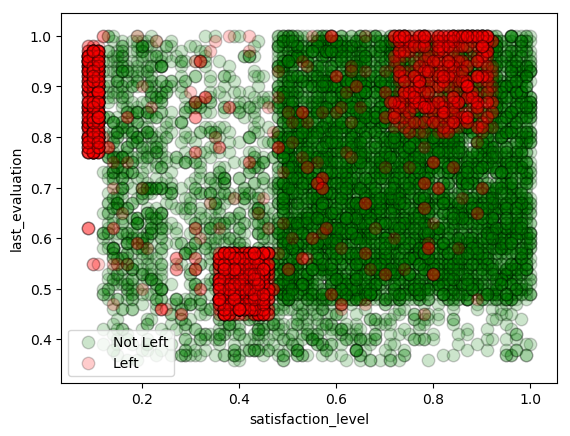

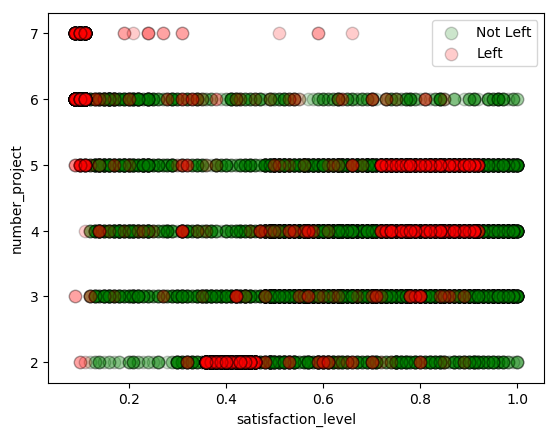

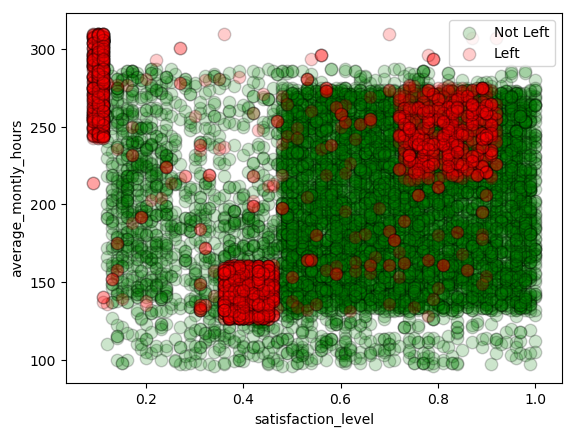

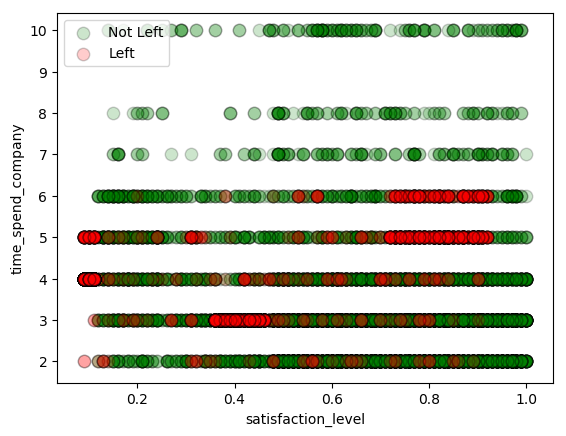

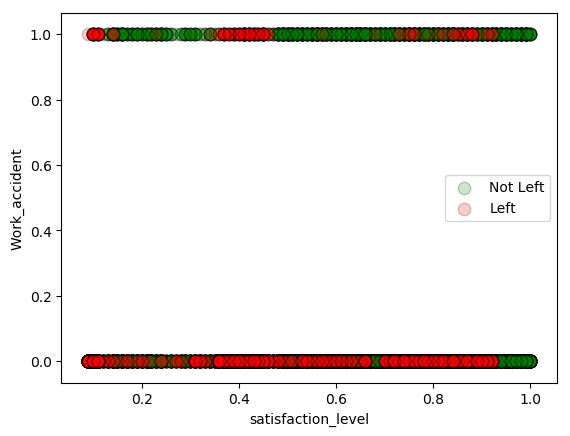

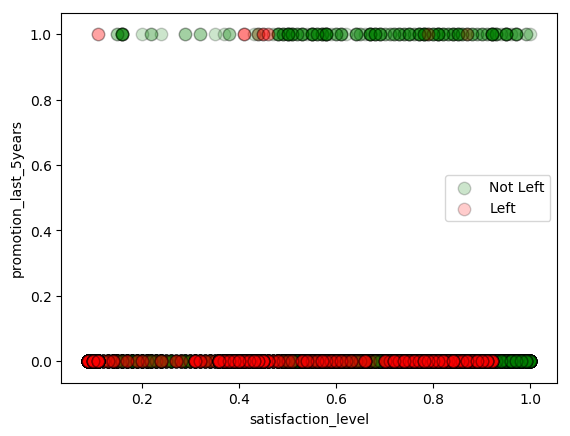

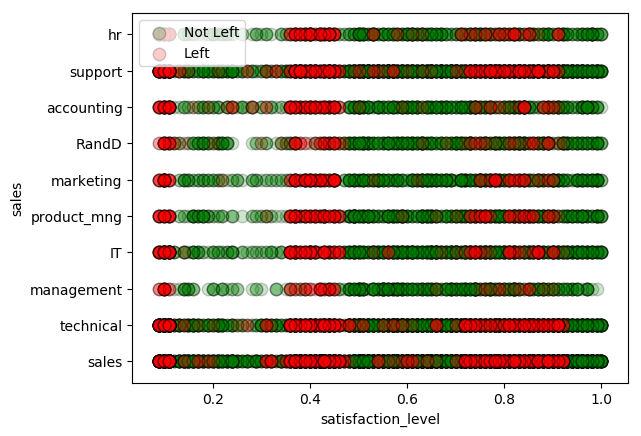

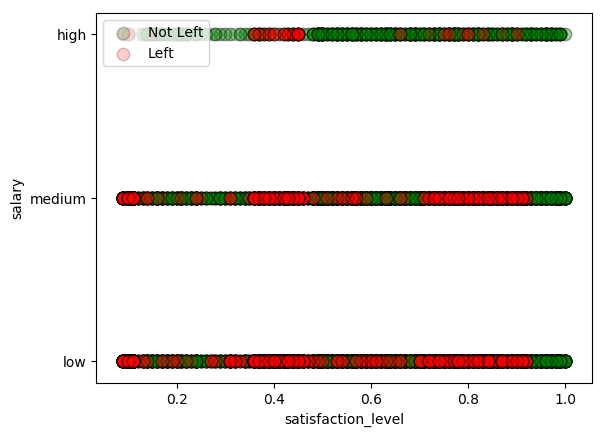

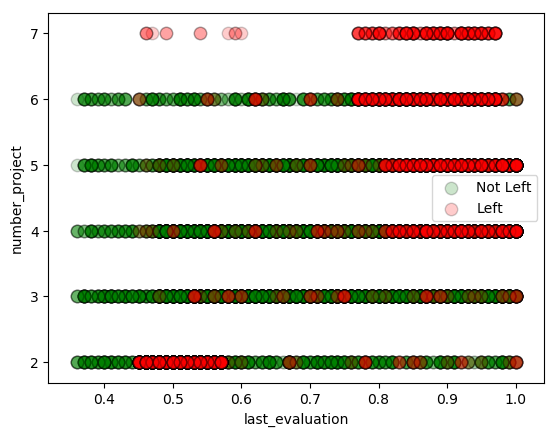

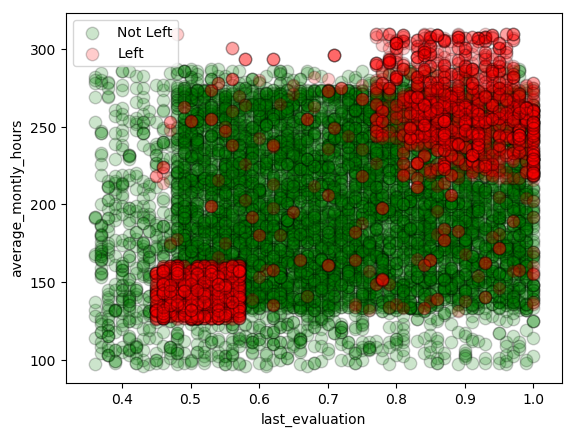

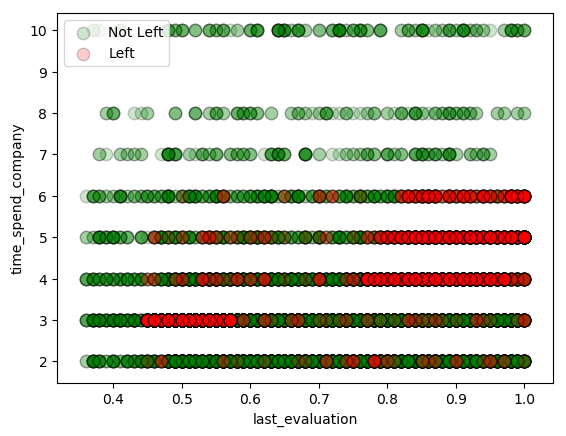

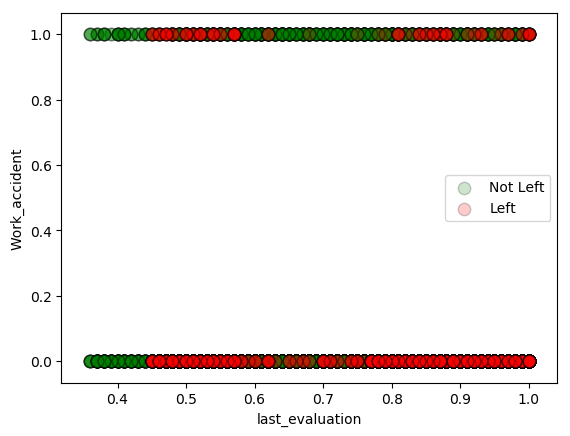

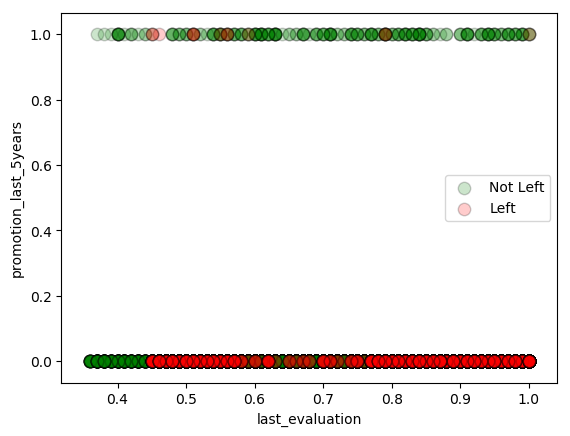

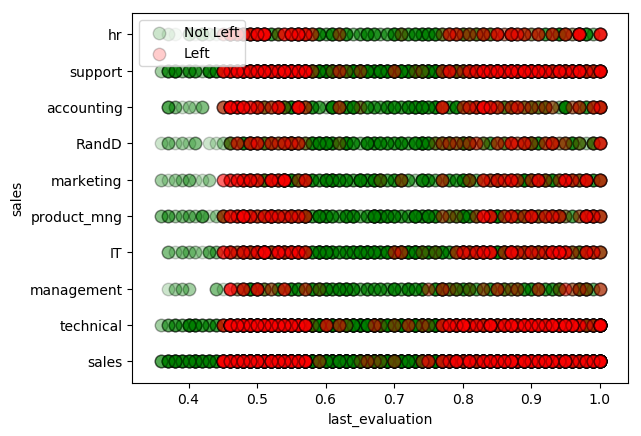

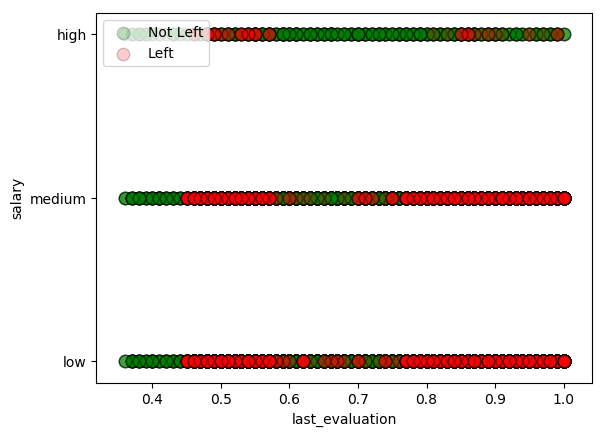

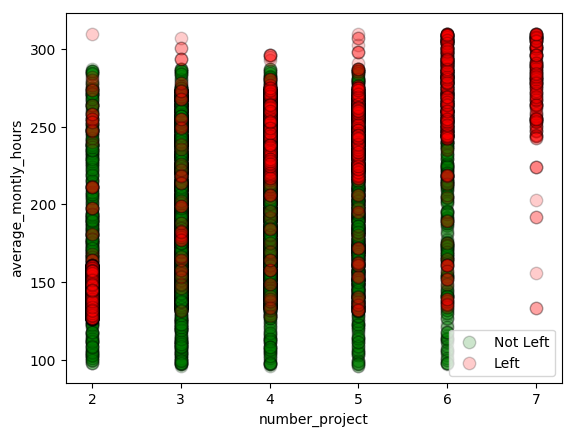

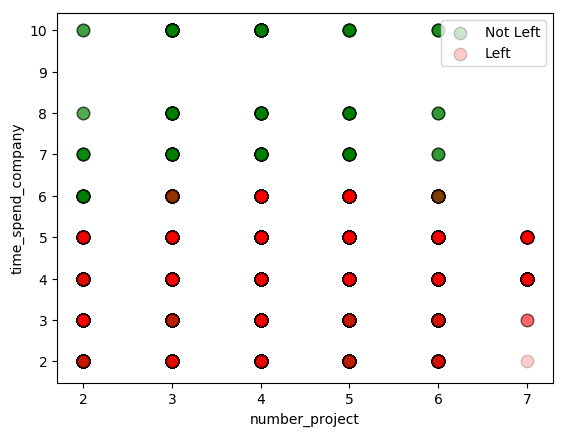

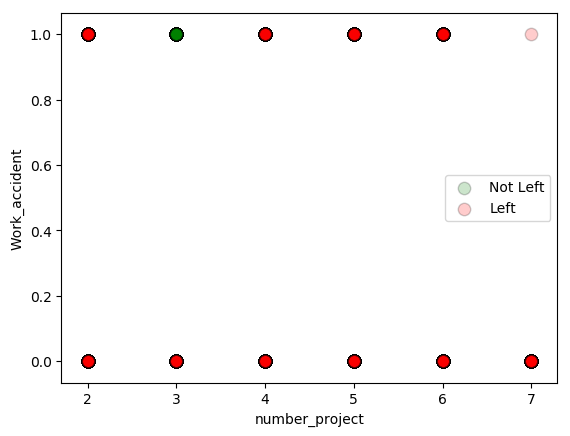

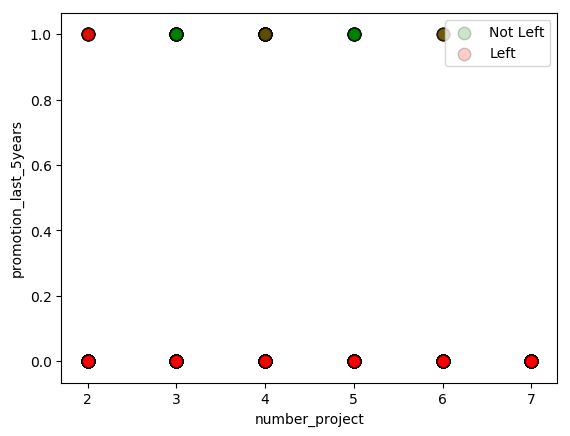

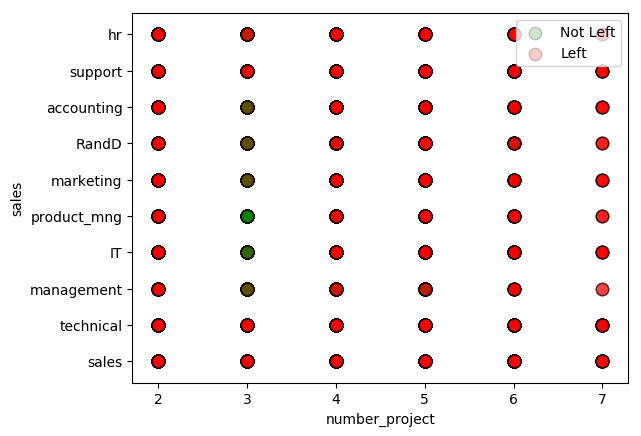

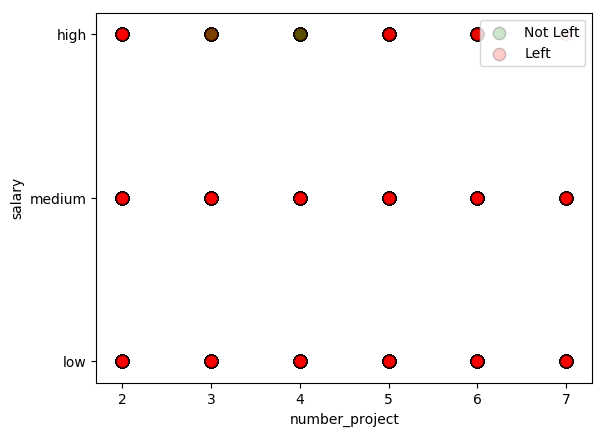

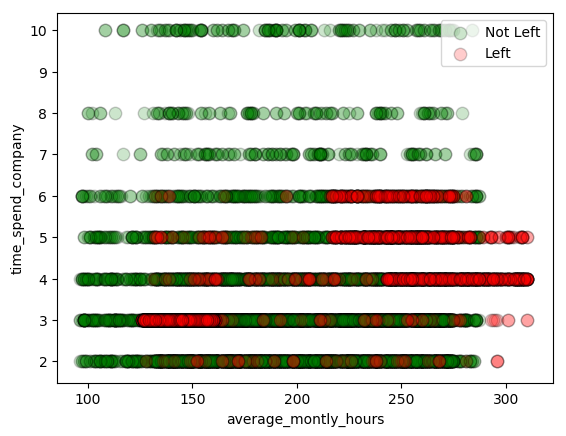

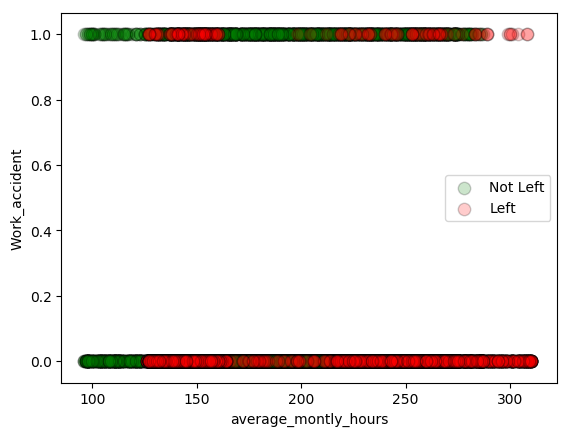

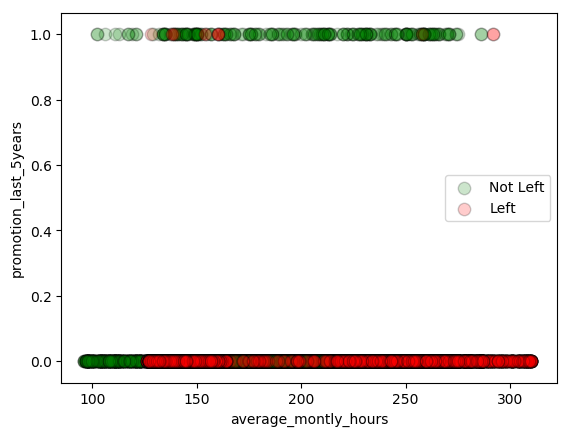

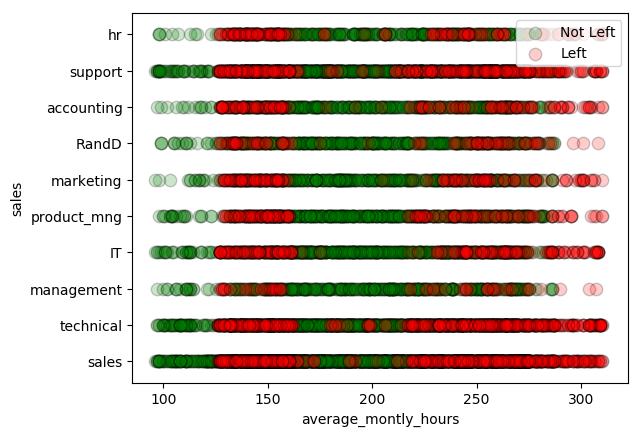

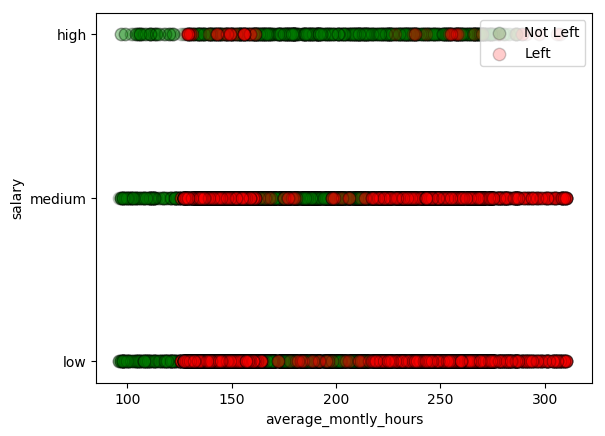

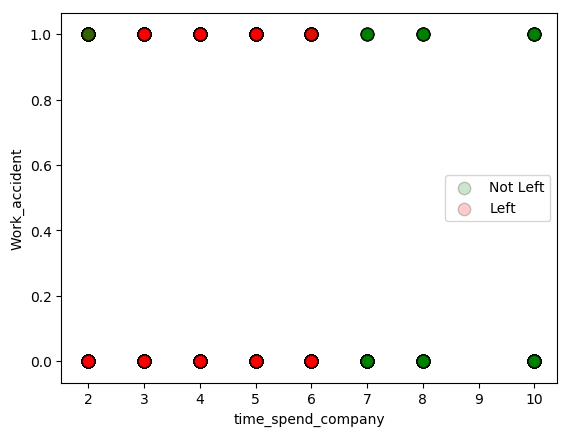

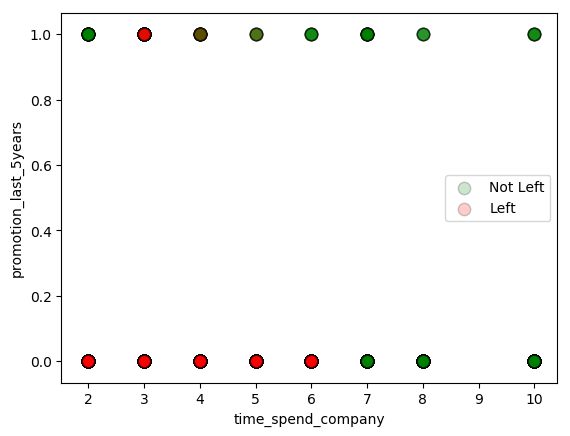

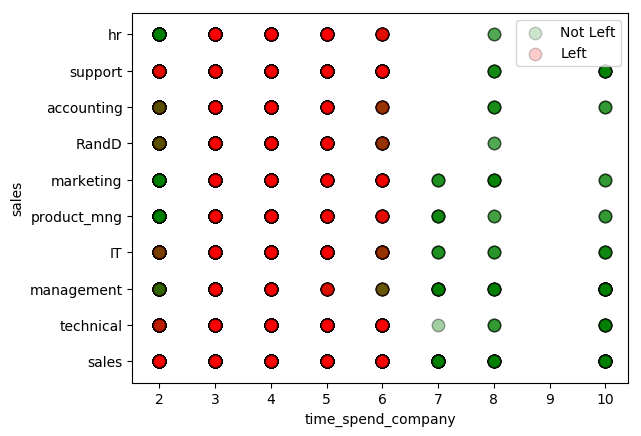

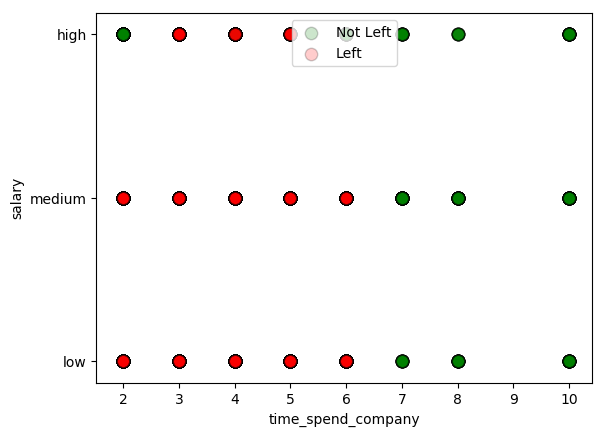

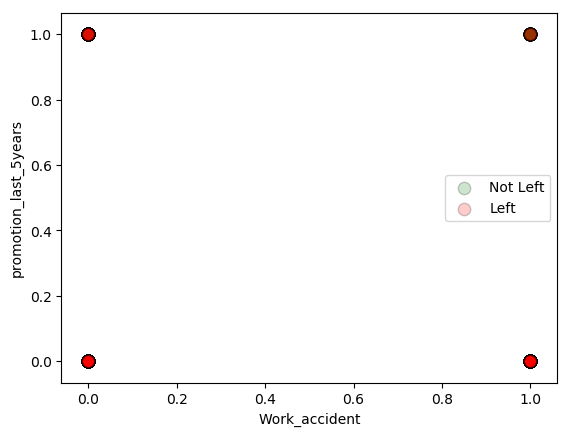

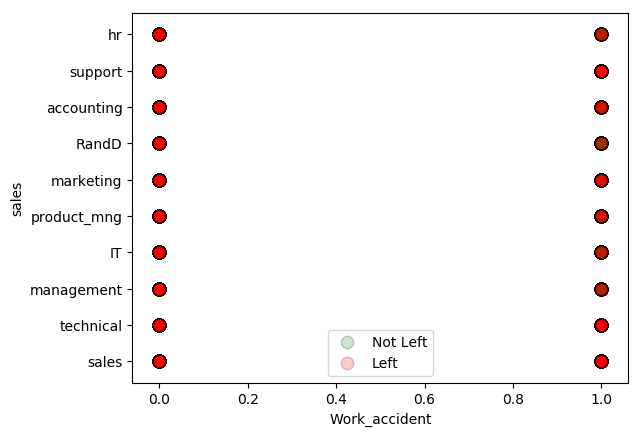

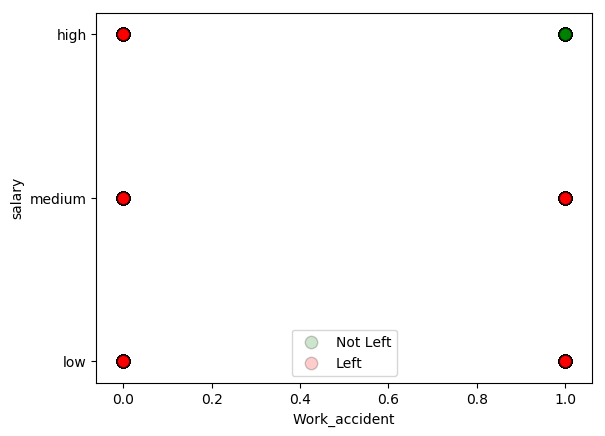

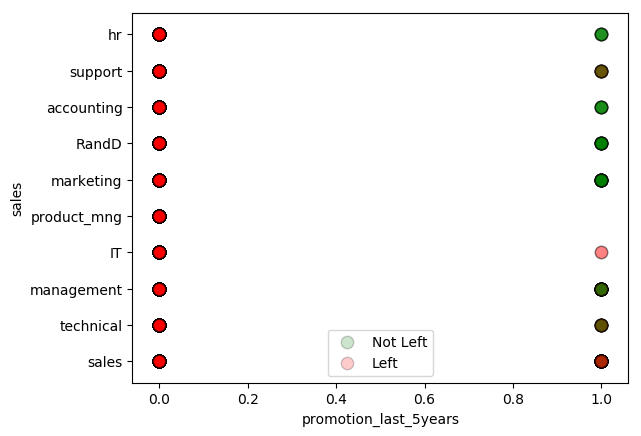

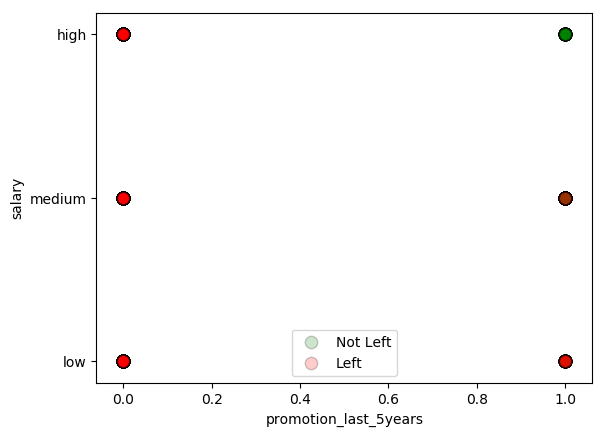

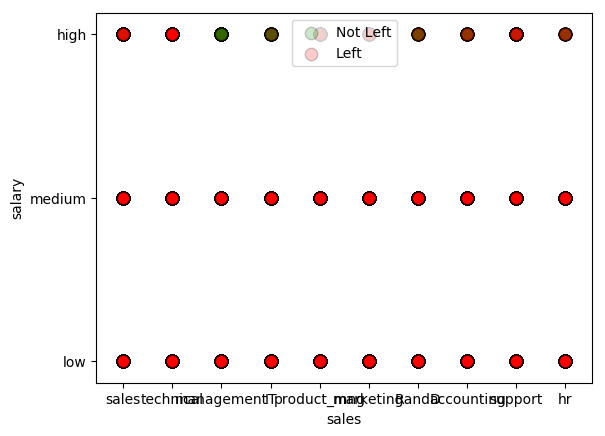

In [112]:
visualizeTrainingData("train.csv")

# <a style="text-decoration:none;color:#000" id="section6">Part-5: Validation error with respect to depth of decision tree.</a>

## <a style="text-decoration:none;color:#000" id="section61">-Code</a>

In [61]:
# import matplotlib.pyplot as plt
# import matplotlib.style
mpl.rcParams.update(mpl.rcParamsDefault)

def visualizeErrors(trainFile,trainDataPercent,classifier,impType):
    if classifier=="categorical":
        pFunc=buildTreeCategorical
    elif classifier== "numerical":
        pFunc=buildTreeCatAndNum
    else:
        print("Wrong Parameter",dType)
        return
    
    if not(config(trainFile,trainDataPercent,None)):
        return
    x=[[],[],[],[],[]]
    y=[[],[],[],[],[]]
    for i in range(1,11):
        tree=pFunc(trainData,cFeatures,impType,i)
        ans=predict(tree,classifier,trainDataPercent,impType,True)
        for j in range(5):
            y[j].append(ans[j])
            x[j].append(i)
    
    plt.xlabel("Depth/Number of Nodes")
    plt.plot(x[0], y[0],color="orange", linewidth=2.5)
    plt.ylabel("Validation Errors (in Percent)")
    plt.grid(True)
    plt.show()
    
    plt.grid(True)
    plt.plot(x[2], y[2],color="orange", linewidth=3.5,label="Precision")
    plt.plot(x[1], y[1],color="green", linewidth=2.5,label="Accuracy")
    plt.plot(x[4], y[4],color="b", linewidth=2.5,label="F1-Score")
    plt.plot(x[3], y[3],color="m", linewidth=2.5,label="Recall")
    
    plt.legend(loc=4)
    plt.ylabel("Performance Measures")
    plt.grid(True)
    plt.show()

## <a style="text-decoration:none;color:#000" id="section62">-Generate Graphs</a>

You can pass following parameters in order:

* Param1     : Training Data file

* Param2     : Training Data (percent to train on) Ex. 90 means TrainingData=90% and ValidationData=10% (remaining data)

* Param4     : Classifier Type ( "numerical" or "categorical")

* Param4     : Impurity type, possible values: entropy , gini, misClass **(Note: this must be given without quotes)**

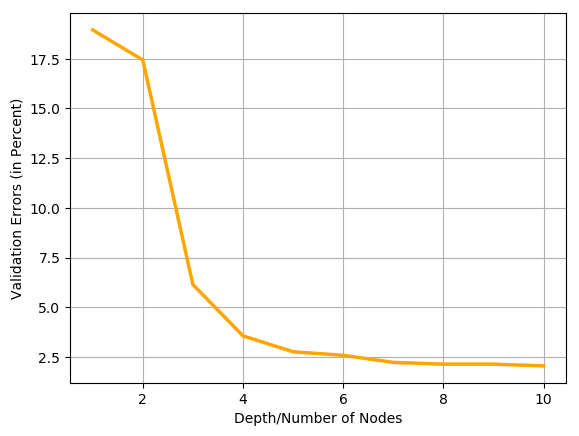

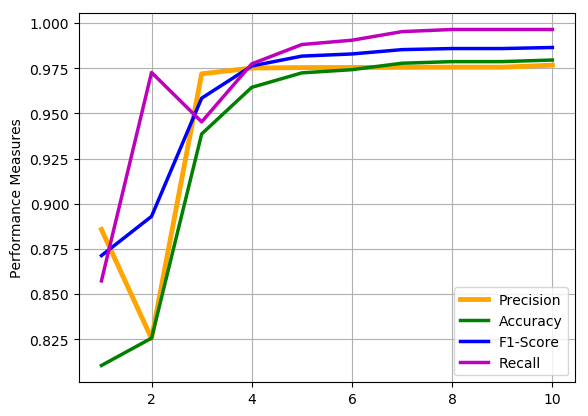

In [60]:
visualizeErrors("train.csv",90,"numerical",gini)

In [132]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix  

def skLearn(trainFile,trainDataPercent,classifier,impType,testFile=None,target="left"):
    if trainDataPercent==100:
        print("No Validation data (Training percent should be less than 100)")
        return
    try:
        data=pd.read_csv(trainFile)
    except:
        print("Error reading train File")
        return
    le = LabelEncoder()
    X=None
    if classifier!="categorical" and classifier!="numerical":
        print("Invalid value of classifier argument (must be categorical or numerical)")
        return
    
    if "salary" in cFeatures or "salary" in nFeatures:
        data["salary"]=(le.fit_transform(data["salary"]))
    if "sales" in cFeatures or "sales" in nFeatures:
        data["sales"]=(le.fit_transform(data["sales"]))
    
    X=data.drop(target,axis=1)
    Y=data[target]
    
    if classifier=="categorical":
        X=X.drop(nFeatures,axis=1)
    
    
    trainX,testX,trainY,testY=train_test_split(X,Y,test_size=(100-trainDataPercent)/100,shuffle=False)
    tree = DecisionTreeClassifier(criterion = impType)      
    tree.fit(trainX, trainY)  
    y_pred = tree.predict(testX)  
    matrix=precision_recall_fscore_support(testY,y_pred,average="binary",pos_label=0)
#     print(classification_report(testY, y_pred))
    print("--------------------------------------------------------")
    print("Scikit Learn Results for ( ",classifier," )")
    print("Trained on %d percent of Training data " %(trainDataPercent))
    print("Total DataSets: ",len(data))
    print("Training DataSets: ",int(len(data)*(trainDataPercent/100)+0.5))
    print("Validation DataSets: ",int(len(data)*(1-trainDataPercent/100)+0.5))
    print("Impurity Measure: ",impType)
    print("--------------------------------------------------------")
    print("Accuracy = ", accuracy_score(testY,y_pred))
    print("Precision = ", matrix[0])
    print("Recall = ", matrix[1])
    print("F1-Score = ", matrix[2])

# <a style="text-decoration:none;color:#000" id="section8">Comparision of my algorithm with scikit-learn.</a>

In [133]:
trainAndTestNumerical("train.csv",90,entropy)
skLearn("train.csv",90,"numerical","entropy")

trainAndTestCategorical("train.csv",90,entropy)
skLearn("train.csv",90,"categorical","entropy")

--------------------------------------------------------
My Classifier Results for (  numerical  )
Trained on 90 percent of Training data 
Total DataSets:  11238
Training DataSets:  10114
Validation DataSets:  1124
Impurity Measure:  entropy
Truelly Validated:  1100
Falsely Validated:  24
--------------------------------------------------------
Accuracy:  0.9786476868327402
Precision:  0.9755529685681025
Recall:  0.9964328180737217
F1-Score:  0.9858823529411765
--------------------------------------------------------
Scikit Learn Results for (  numerical  )
Trained on 90 percent of Training data 
Total DataSets:  11238
Training DataSets:  10114
Validation DataSets:  1124
Impurity Measure:  entropy
--------------------------------------------------------
Accuracy =  0.9786476868327402
Precision =  0.9892215568862276
Recall =  0.9821640903686087
F1-Score =  0.9856801909307876
--------------------------------------------------------
My Classifier Results for (  categorical  )
Trained on 9